<figure>
<center>
<img src="../Imagenes/logo_final.png"  align="left"/> 
</center>   
</figure>

# <span style="color:red"><center>Introducción a mecanismos de atención</center></span>

<center>De la Biología a la Matemática</center>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Referencias</span>

1. Ashish Vaswani et al.,  [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf), diciembre 2017.
1. Dennis Rothman, [Transformers for Natural Language processing](http://libgen.rs/search.php?req=Transformers+for+Natural+Language+processing&open=0&res=25&view=simple&phrase=1&column=def), enero 2021.
1. Varios,[Dive into deep learning](https://d2l.ai/), enero 2021

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Señales de atención en Biología](#Señales-de-atención-en-Biología)
* [Consultas, claves y valores](#Consultas,-claves-y-valores)
* [Atención agrupada. Regresión kernel de Nadaraya-Watson](#Atención-agrupada.-Regresión-kernel-de-Nadaraya-Watson)
* [Funciones de puntuación de atención](#Funciones-de-puntuación-de-atención)
* [Activación aditiva](#Activación-aditiva)
* [Operación Softmax enmascarada](#Operación-Softmax-enmascarada)
* [Atención multi-cabeza](#Atención-multi-cabeza)


## <span style="color:blue">Introducción</span>

Gracias por su atención
a este cuaderno.
La atención es un recurso escaso:
en este momento
está leyendo este cuadernoa adaptado de [Dive into deep learning](https://d2l.ai/)
e ignorando el resto.
Así, similar al dinero,
su atención se está brindando a un costo de oportunidad.


`Atención es la piedra angular en el arco de la vida y  contiene la clave del excepcionalismo de cualquier trabajo`.


En la era de la economía de la atención,
donde el cuidado humano es tratado como un bien limitado, valioso y escaso
que se puede intercambiar, numerosos modelos de negocio se han
desarrollado para capitalizarlo.


En servicios de transmisión de música o video,
prestamos atención a sus anuncios
o pagar dinero para esconderlos.
Para crecer en el mundo de los juegos online,
o prestamos atención a
participar en batallas, que atraen a nuevos jugadores,
o pagamos dinero para volverse poderoso instantáneamente.
Nada viene gratis.

Considerándolo todo,
la información de nuestro entorno no es escasa,
la atención lo es.

Al inspeccionar una escena visual,
nuestro nervio óptico recibe información
del orden de $ 10 ^ 8 $ bits por segundo,
superando con creces lo que nuestro cerebro puede procesar por completo.

Por suerte,
nuestros antepasados `habían aprendido de la experiencia` (también conocidos como datos)
que `no todas las entradas sensoriales son iguales`.

A lo largo de la historia de la humanidad,
la capacidad de dirigir la atención
solo una fracción de la información de interés
ha habilitado nuestro cerebro
para asignar recursos de manera más inteligente
sobrevivir, crecer y socializar,
cómo detectar depredadores, presas y parejas.

## <span style="color:blue">Señales de atención en Biología</span>

Para explicar cómo se despliega nuestra atención en el mundo visual,
ha surgido un marco de dos componentes
y ha sido omnipresente.

Esta idea se remonta a William James en la década de 1890,
quien es considerado el "padre de la psicología estadounidense". En este marco,
los sujetos dirigen selectivamente el foco de atención
usando tanto la *señal no volitiva*(no voluntaria) como la *señal volitiva* (voluntaria).


La señal no volitiva se basa en
la prominencia y la visibilidad de los objetos en el entorno.
Imagina que hay cinco objetos frente a ti:
un periódico, un trabajo de investigación, una taza de café, un cuaderno y un libro como en: la siguiente imagen.

![Using the nonvolitional cue based on saliency (red cup, non-paper), attention is involuntarily directed to the coffee.](../Imagenes/eye-coffee.svg)

Fuente [Dive into Deep learning](https://d2l.ai/)

Si bien todos los productos de papel se imprimen en blanco y negro,
la taza de café es roja.
En otras palabras,
este café es intrínsecamente destacado y conspicuo en
este entorno visual,
llama la atención de forma automática e involuntaria.
Entonces, lleva la fóvea (el centro de la mácula donde la agudeza visual es más alta) sobre el café como se muestra en laimagen.



Después de tomar café, usted
está cafeinado y
quiere leer un libro.
Entonces gira la cabeza, reenfoca sus ojos
y mira el libro como se muestra en la figura de abajo.

Diferente de 
el caso anterior
donde el café le predispone hacia
seleccionar en función de la prominencia,
en este caso dependiente de la tarea, selecciona el libro en
control cognitivo y volitivo.

Usando la señal volitiva basada en criterios de selección de variables,
esta forma de atención es más deliberada.
También es más poderoso con el esfuerzo voluntario del sujeto.


![Using the volitional cue (want to read a book) that is task-dependent, attention is directed to the book under volitional control.](../Imagenes/eye-book.svg)

Fuente [Dive into Deep learning](https://d2l.ai/)

## <span style="color:blue">Consultas, claves y valores</span>

**Queries, Keys, and Values**

Inspirados por las señales de atención no volitiva y volitiva que explican el despliegue atencional,
en lo que  sigue lo haremos es
describir un marco 
diseñando para mecanismos de atención, incorporando estas dos señales de atención.

Para empezar, considere el caso más simple en el que solo
hay señales no voluntarias disponibles.



Para sesgar la selección sobre las entradas sensoriales,
simplemente podemos usar
una capa parametrizada totalmente conectada
o incluso no parametrizada, resumiendo
por el máxima o por la media de las entradas sensoriales.

Por lo tanto,
lo que fija los mecanismos de atención
aparte de esas capas completamente conectadas
o  capas de agrupación 
es la inclusión de las señales volitivas.
En el contexto de los mecanismos de atención,
nos referimos a las señales volitivas como *consultas*(`queries`).



Dada cualquier consulta,
mecanismos de atención
selección sesgan la atención sobre las entradas sensoriales (por ejemplo, representaciones de características intermedias) a través de `atención conjunta` (*pooling attention*).


Estas entradas sensoriales se denominan `valores` (*values*) en el contexto de los mecanismos de atención. 

Más generalmente, cada `valor` está emparejado con una `clave`,
que se puede pensar en la señal no volitiva de esa entrada sensorial.

Como se muestra en la figura que sigue, 
podemos diseñar la atención conjunta
para que la consulta dada (señal volitiva) pueda interactuar con las claves (señales no volitivas),
que guía la selección del sesgo sobre los valores (entradas sensoriales).

![Attention mechanisms bias selection over values (sensory inputs) via attention pooling, which incorporates queries (volitional cues) and keys (nonvolitional cues).](../Imagenes/qkv.svg)

Fuente [Dive into Deep learning](https://d2l.ai/)

Nótese que existen muchas alternativas para el diseño de mecanismos de atención.
Por ejemplo,
podemos diseñar un modelo de atención no diferenciable
que se pueden entrenar utilizando métodos de aprendizaje por refuerzo:
Dado el dominio del marco en la figura previa,
modelos bajo este marco será el centro de nuestro atención en este ciuaderno.



## <span style="color:blue">Aprendizaje automático con mecanismos de atención. Regresión Nadaraya-Watson</span>


Ahora que conoce los componentes principales de los mecanismos de atención bajo el marco presentado arriba recapitulemos: las interacciones entre
consultas (señales volitivas) y claves (señales no volitivas)
resultan en *atención conjunta* (`attention pooling`).
La atención puesta en común agrega selectivamente valores (entradas sensoriales) para producir la salida.
En esta sección,
Describiremos la atención conjunta con mayor detalle.
para darle una vista de alto nivel de
cómo funcionan los mecanismos de atención en la práctica.
Específicamente,
el modelo de regresión kernel de Nadaraya-Watson
propuesto en 1964
es un ejemplo simple pero completo
para demostrar el aprendizaje automático con mecanismos de atención.

### Generación de un conjunto de datos

Para mantener las cosas simples
consideremos el siguiente problema de regresión:
dado un conjunto de datos de pares de entrada-salida $\{(x_1, y_1), \ldots, (x_n, y_n)\}$,
como enseñarle a $f$ a predecir la salida $\hat{y} = f(x)$ para cualquier entranada nueva $x$?

Aquí generamos un conjunto de datos artificial de acuerdo con la siguiente función no lineal con el término de ruido $\epsilon$:

$$y_i = 2\sin(x_i) + x_i^{0.8} + \epsilon,$$

en donde $\epsilon$ obedece a una distribución normal con media cero y desviación estándar de 0,5.
50 ejemplos de entrenamiento y 50 ejemplos de prueba
son generadas.

Para visualizar mejor el patrón de atención más adelante, se ordenan las entradas de entrenamiento.

In [14]:
import numpy as np

n_train = 50  # No. of training examples
x_train = np.sort(np.random.uniform(size=n_train)*5)  # Training inputs

In [15]:
def f(x):
    return 2 * np.sin(x) + x**0.8

y_train = f(x_train) + np.random.normal(0.0, 0.5, (n_train,))  # Training outputs
x_test = np.arange(0, 5, 0.1)  # Testing examples
y_true = f(x_test)  # Ground-truth outputs for the testing examples
n_test = len(x_test)  # No. of testing examples
n_test

50

La siguiente función traza todos los ejemplos de entrenamiento (representados por círculos),
la función de generación de datos verdaderos de `f` sin el término de ruido (etiquetada como  *Verdadero*), y la función de predicción aprendida (etiquetada como *Pred*).


In [48]:
import matplotlib.pyplot as plt

def plot_kernel_reg(x_test, y_true,y_hat, _x_train, y_train,title):
    plt.plot(x_test, y_true, label='verdadero')
    plt.plot(x_test, y_hat, label='predicho')
    plt.plot(x_train, y_train, 'o', alpha=0.5, label='clave-valor')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

### Agrupación promedio. Average Pooling

Comenzamos con quizás el estimador más "tonto" del mundo para este problema de regresión:
utilizando la agrupación promedio para promediar todos los resultados entrenamiento:

$$f(x) = \frac{1}{n}\sum_{i=1}^n y_i,$$


que se traza a continuación. Como podemos ver, este estimador no es tan inteligente.

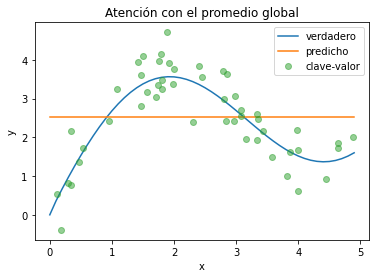

In [52]:
y_hat = np.repeat(y_train.mean(), n_test)
plot_kernel_reg(x_test, y_true,y_hat, x_train, y_train, title='Atención con el promedio global')

### Atención agrupada no-paramétrica



Obviamente,
la agrupación promedio omite las entradas $x_i$.
Se propuso una mejor idea
por Nadaraya y Watson
para pesar las salidas $y_i$ de acuerdo con sus localizaciones de entrada:

$$f(x) = \sum_{i=1}^n \frac{K(x - x_i)}{\sum_{j=1}^n K(x - x_j)} y_i,$$


en donde  $K$ es un *kernel*.
El estimador en la ecuación anterior
se llama *Regresión de kernel de Nadaraya-Watson*.
Aquí no profundizaremos en los detalles de los kernel.

Recuerde el marco de los mecanismos de atención presentado arriba. Desde la perspectiva de la atención, podemos reescribir esta ecuación en una forma más generalizada de atención agrupada (*attention pooling*):

$$f(x) = \sum_{i=1}^n \alpha(x, x_i) y_i,$$


en donde $x$ es la consulta y en donde $(x_i, y_i)$ es la pareja *clave-valor*.
Comparando con las dos ecuaciones previas,
la atención agrupada aquí 
es un promedio pesado de los valores $y_i$.
El *peso de atención* (*attention weight*) $\alpha(x, x_i)$
en esta ecuación es asignado al correspondiente valor $y_i$
basado en la interacción entre la consulta
$x$ y la clave $x_i$.

Para cualquier consulta, sus ponderaciones de atención sobre todos los pares *clave-valor* son una distribución de probabilidad válida: no son negativas y suman uno.

Para obtener intuiciones de la atención conjunta,
solo considere un *kernel gaussiano* definido como
$$
K(u) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{u^2}{2}).
$$



Conectando el kernel gaussiano a las ecuaciones anteriores se obtiene

$$\begin{aligned} f(x) &=\sum_{i=1}^n \alpha(x, x_i) y_i\\ &= \sum_{i=1}^n \frac{\exp\left(-\frac{1}{2}(x - x_i)^2\right)}{\sum_{j=1}^n \exp\left(-\frac{1}{2}(x - x_j)^2\right)} y_i \\&= \sum_{i=1}^n \mathrm{softmax}\left(-\frac{1}{2}(x - x_i)^2\right) y_i. \end{aligned}$$


En esta última ecuación, 
una clave $x_i$ que es más cercana a la consulta y $x$ prestará *más atención*
via un *peso de atención más grande*  para el correspondiente valor $y_i$.

Algo notable es que,  el kernel Nadaraya-Watson kernel es un modelo no paramétrico;
entonces, es un ejemplo de *atención agrupada no paramétrica*.

A continuación, trazamos la predicción basada en este
modelo de atención no paramétrico.
La línea predicha es suave y más cercana al valor verdadero que la producida por la agrupación promedio mostrada arriba.

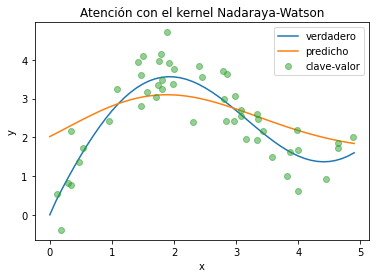

In [53]:
import tensorflow as tf
# Shape of `X_repeat`: (`n_test`, `n_train`), where each row contains the
# same testing inputs (i.e., same queries)
X_repeat = x_test.repeat(n_train).reshape((-1, n_train))
# Note that `x_train` contains the keys. Shape of `attention_weights`:
# (`n_test`, `n_train`), where each row contains attention weights to be
# assigned among the values (`y_train`) given each query
attention_weights = tf.nn.softmax(-(X_repeat - x_train)**2 / 2).numpy()
# Each element of `y_hat` is weighted average of values, where weights are
# attention weights
y_hat = np.matmul(attention_weights, y_train)
plot_kernel_reg(x_test, y_true,y_hat, x_train, y_train, 'Atención con el kernel Nadaraya-Watson')

## <span style="color:blue">Funciones de puntuación de atención</span>

En la sección anterior
utilizamos un kernel gaussiano para modelar
interacciones entre consultas y claves.
Tratando el exponente del kernel gaussiano
como una *función de puntuación de atención* (o *función de puntuación* para abreviar).

Los resultados de esta función fueron
esencialmente alimentados con
una operación softmax.

Como resultado,
obtuvimos una distribución de probabilidad (ponderaciones de atención)
sobre valores que están emparejados con claves.
Al final,la salida de la atención puesta en común
es simplemente una suma ponderada de los valores
basado en estos pesos de atención.

A un nivel alto, 
podemos usar el algoritmo anterior
para instanciar el marco de los mecanismos de atención presentado previamente

Denotando una función de puntuación de atención por $ a $,
la siguiente imagen ilustra cómo la salida de la atención agrupada
se puede calcular como una suma ponderada de valores.
Dado que los pesos de atención son
una distribución de probabilidad,
la suma ponderada es esencialmente
un promedio ponderado.


![Computing the output of attention pooling as a weighted average of values.](../Imagenes/attention-output.svg)

Fuente [Dive into Deep learning](https://d2l.ai/)

Matemáticamente,
supongamos que tenemos
una consulta $\mathbf{q} \in \mathbb{R}^q$
y $m$ parejas clave-valor $(\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)$, en donde cada $\mathbf{k}_i \in \mathbb{R}^k$ y en donce cada $\mathbf{v}_i \in \mathbb{R}^v$.
La atención agrupada $f$
es instanciada como una suma pesada de los valores:

$$f(\mathbf{q}, (\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)) = \sum_{i=1}^m \alpha(\mathbf{q}, \mathbf{k}_i) \mathbf{v}_i \in \mathbb{R}^v,$$


en donde los pesos atencionales (escalares) para la consulta $\mathbf{q}$
y la clave $\mathbf{k}_i$
es calculada por la operación softmax de unafunción de puntaje atencional
$a$ que mapea(transforma) dos vectores en un escalar


$$\alpha(\mathbf{q}, \mathbf{k}_i) = \mathrm{softmax}(a(\mathbf{q}, \mathbf{k}_i)) = \frac{\exp(a(\mathbf{q}, \mathbf{k}_i))}{\sum_{j=1}^m \exp(a(\mathbf{q}, \mathbf{k}_j))} \in \mathbb{R}.$$

Como podemos ver,
diferentes opciones de la función de puntuación de atención $ a $
conducen a diferentes comportamientos de concentración de la atención.
En esta sección,
presentamos dos funciones de puntuación populares
que usaremos para desarrollar más
mecanismos de atención sofisticados más tarde.

In [1]:
import math
import tensorflow
from tensorflow import nn
import utils_d2l_tf as d2l

## <span style="color:blue">Activación aditiva</span>

En general,
cuando las consultas y las claves son vectores de diferentes longitudes,
podemos usar *atención aditiva*
como función de puntuación.

Dada una consulta $\mathbf{q} \in \mathbb{R}^q$
y una clave $\mathbf{k} \in \mathbb{R}^k$,
la  función de puntaje *atención aditiva* es dada por

$$a(\mathbf q, \mathbf k) = \mathbf w_v^\top \text{tanh}(\mathbf W_q\mathbf q + \mathbf W_k \mathbf k) \in \mathbb{R},$$


en donde los parámetros que deben aprenderse son
$\mathbf W_q\in\mathbb R^{h\times q}$, $\mathbf W_k\in\mathbb R^{h\times k}$, y $\mathbf w_v\in\mathbb R^{h}$.


## <span style="color:blue">Operación Softmax enmascarada</span>

Como acabamos de mencionar,
se utiliza una operación softmax para
generar una distribución de probabilidad como pesos de atención.

Sinembargo, en algunos casos,
no todos los valores deben incluirse en la atención conjunta.
Por ejemplo, para un procesamiento eficiente de un minibatch de secuencias de texto, 
algunas de estas se rellenan con
tokens especiales que no tienen significado.

Para llamar la atención solo se deben tomar tokens significativos como valores.
Podemos especificar una longitud de secuencia válida (en número de tokens)
para filtrar aquellos fuera de este rango especificado
al calcular softmax.

De este modo, podemos implementar tal *operación softmax enmascarada*, en la cual más allá de  un límite predefinido los token no son tenidos en cuenta (es tal caso el peso de atención se define como cero.

## <span style="color:blue">Atención multi-cabeza</span>

En la práctica,
dado el mismo conjunto de consultas, claves y valores
es posible que queramos que nuestro modelo
combine el conocimiento de
diferentes comportamientos con el mismo mecanismo de atención,
como capturar dependencias de varios rangos (por ejemplo, rango más corto frente a rango más largo)
dentro de una secuencia.


Por lo tanto,
puede ser beneficioso
permitir a nuestro mecanismo de atención
utilizar conjuntamente diferentes subespacios de representación
de consultas, claves y valores.



Para tal fin,
en lugar de realizar una agrupación de atención única de
consultas, claves y valores
podemos transformar el mecanismo de atención con $ h $ proyecciones lineales aprendidas de forma independiente.

Luego, estas consultas, claves y valores proyectados de $ h $
alimentan a la atención conjunta en paralelo.


Al final, las  $ h $ salidas de agrupación de atención
son concatenadas y
transformadas con otra proyección lineal aprendida
para producir el resultado final.

Este diseño se llama *atención multicabezal*. En este diseño
cada una de las  $ h $ salidas de agrupación de atención 
es una *cabeza*. Para detalles, consulte el artículo original [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf).

El uso de capas completamente conectadas
para realizar transformaciones lineales aprendibles,
describe la atención de múltiples cabezas, como se ilustra en la siguiente imagen.

![Multi-head attention, where multiple heads are concatenated then linearly transformed.](../Imagenes/multi-head-attention.svg)


Fuente [Dive into Deep learning](https://d2l.ai/)

### El modelo

El modelo multi-cabeza se formaliza matemáticamente como sigue.

Dada una consulta $\mathbf{q} \in \mathbb{R}^{d_q}$,
una clave $\mathbf{k} \in \mathbb{R}^{d_k}$,
y un valor  $\mathbf{v} \in \mathbb{R}^{d_v}$,
cada cabeza de atención $\mathbf{h}_i$  ($i = 1, \ldots, h$)
es calculada como

$$\mathbf{h}_i = f(\mathbf W_i^{(q)}\mathbf q, \mathbf W_i^{(k)}\mathbf k,\mathbf W_i^{(v)}\mathbf v) \in \mathbb R^{p_v},$$

en donde los parámetros entrenables son:

$\mathbf W_i^{(q)}\in\mathbb R^{p_q\times d_q}$,
$\mathbf W_i^{(k)}\in\mathbb R^{p_k\times d_k}$
y $\mathbf W_i^{(v)}\in\mathbb R^{p_v\times d_v}$,

y en donde $f$ es una función de  atención conjunta, tal como se describe en la sección de funciones de puntaje atencionales.


La salida de atención de múltiples cabezas
es otra transformación lineal a través de
parámetros aprendibles

$\mathbf W_o\in\mathbb R^{p_o\times h p_v}$
de la concatenación de  $h$ cabezas:

$$\mathbf W_o \begin{bmatrix}\mathbf h_1\\\vdots\\\mathbf h_h\end{bmatrix} \in \mathbb{R}^{p_o}.$$

Basado en este diseño,
cada cabeza puede atender diferentes partes de la entrada.

Funciones más sofisticadas que el promedio ponderado simple
se puede utilizar.